In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = 8, 6
my_fontsize = 18
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': (fig_w, fig_h),
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)
my_layout = widgets.Layout()

# Auto Reloading
%load_ext autoreload
%autoreload 2

# %matplotlib widget

### Network of LIFs

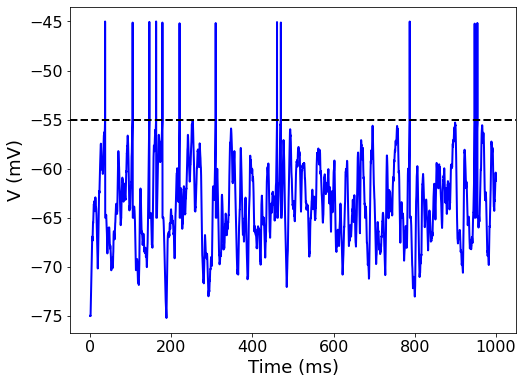

In [22]:
from lib.neuron import LIF
from lib.input import Poisson_generator
from lib.conn import Simulator
from lib.helper import plot_volt_trace

T, dt = 1e3, 0.1
wt = 1.
rt = 1e3

# neurons
nrn = LIF()

# inputs
exc_in = Poisson_generator(rate=rt)
inh_in = Poisson_generator(rate=rt)

# connection
nrn.connect(exc_in, {'weight': wt})
nrn.connect(inh_in, {'weight': -wt})

# simulate|
simulator = Simulator(dt=dt)
simulator.reg([nrn, exc_in, inh_in])
simulator.run(T)

# visualize
plt_par = {'dt':dt, 'range_t':np.arange(0., T, dt), 'V_th':-55.}
plot_volt_trace(plt_par, nrn.v, np.array(nrn.rec_spikes))